# Laser Wakefield Accelerator - Downramp injection

1D simulation of a laser wakefield accelerator.

In [18]:
import em1d
import matplotlib.pyplot as plt
import numpy

# Time step
dt = 0.019

# Simulation time
tmax = 100

# Number of cells
nx  = 1000

# Simulation box size
box = 20.0


## Background plasma

# Particles per cell
ppc = 32


# Use a step density profile
alpha = 0.1
def density_x(x):
    if x>20 and x < 20+1.0/alpha:
        return 2.0 - alpha*(x-20)
    if x > 20 + .99/alpha:
        return 1.0
    return 0.0

density = em1d.Density( type = "custom", custom = density_x )

electrons = em1d.Species( "electrons", -1.0, ppc,
                           density = density)


# Initialize simulation
sim = em1d.Simulation( nx, box, dt, species = electrons )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 17.0, fwhm = 2.0, a0 = 1.25, omega0 = 10.0, polarization = numpy.pi/2 ))

# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )

# Run the simulation
sim.run( tmax )



Running simulation up to t = 100 ...


n = 623, t = 11.837

n = 5264, t = 100.016
Done.


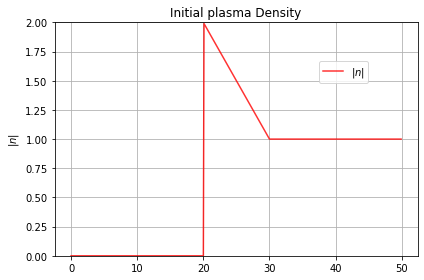

In [19]:
dens = [];
x    = [];
Lx = 50;
nx = 500;
dx = Lx/nx;
for j in range(nx):
    dens.append(density_x(j*dx));
    x.append(j*dx);

    
    
fig, ax1 = plt.subplots()

# Plot values at the center of the cells
xmin = 0.0
xmax = Lx

ax1.plot(x, dens,'r', label = "$|n|$" , alpha = 0.8)
ax1.set_ylabel("|$n$|")
ax1.set_ylim(0,2.0)

plt.title("Initial plasma Density")
plt.grid(True)

fig.legend(loc = (0.75,0.70))
fig.tight_layout()

plt.show()


## Longitudinal Electric field and Plasma Density

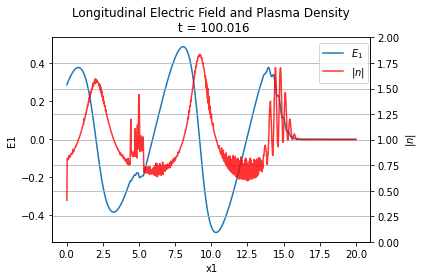

In [20]:
fig, ax1 = plt.subplots()

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

ax1.plot(numpy.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("x1")
ax1.set_ylabel("E1")

ax2 = ax1.twinx()
ax2.plot(numpy.linspace(xmin, xmax, num = sim.nx), numpy.abs(electrons.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax2.set_ylabel("|$n$|")
ax2.set_ylim(0,2)

plt.title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim.t))
plt.grid(True)

fig.legend(loc = (0.75,0.70))
fig.tight_layout()

plt.show()

## x1 - u1 Phasespace

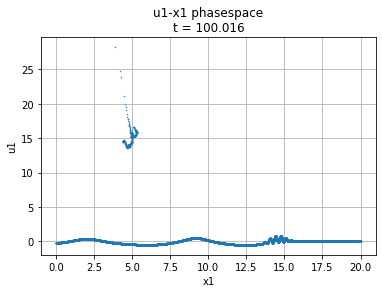

In [21]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx 

plt.plot(x(electrons),  electrons.particles['ux'],  '.', ms = 1.)
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()